# Recurrence
This investigates how a disease spreads when the same individuals travel to a patch instead of different individuals.

Using array indexing, the first axis $i$ selects the population, the second axis $j$ the subpopulation.


In [383]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [449]:
import numpy as np
import matplotlib.pyplot as plt
from commuter_distinguishability_model import simulate
od_matrix = np.array([[100, 10, 10],
                      [15, 150, 10],
                      [20, 5, 200]], dtype=int)
beta = 1.8
gamma = 0.3
t_max = 100
seed_subpatch = [0,1]

In [450]:
od_matrix

array([[100,  10,  10],
       [ 15, 150,  10],
       [ 20,   5, 200]])

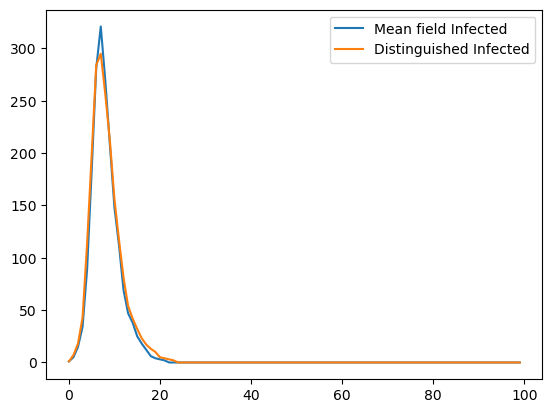

In [451]:
u_s,u_i,u_r = simulate(beta=beta, gamma=gamma, od_matrix=od_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=False)
d_s,d_i,d_r = simulate(beta=beta, gamma=gamma, od_matrix=od_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=True)
# plt.plot(u_s.sum(axis=(1, 2)), label='Mean field Susceptible')
plt.plot(u_i.sum(axis=(1, 2)), label='Mean field Infected')
#plt.plot(u_r.sum(axis=(1, 2)), label='Mean field Recovered')
#plt.plot(d_s.sum(axis=(1, 2)), label='Distinguished Susceptible')
plt.plot(d_i.sum(axis=(1, 2)), label='Distinguished Infected')
#plt.plot(d_r.sum(axis=(1, 2)), label='Distinguished Recovered')
plt.legend()
plt.show()

# Use ONS data

In [452]:
import pandas as pd

In [453]:
commuter_matrix = pd.read_csv("commuter_data/commuter_matrix.csv", index_col=0).values

In [454]:
commuter_matrix

array([[26317,  1500,   671, ...,     2,     3,     0],
       [  770, 37147,  4536, ...,     0,     0,     0],
       [  608,  8451, 35959, ...,     0,     0,     0],
       ...,
       [    0,     1,     7, ..., 53541,    27,    94],
       [    0,     0,     0, ...,   159, 52307,   186],
       [    0,     0,     0, ...,   242,   256, 17725]])

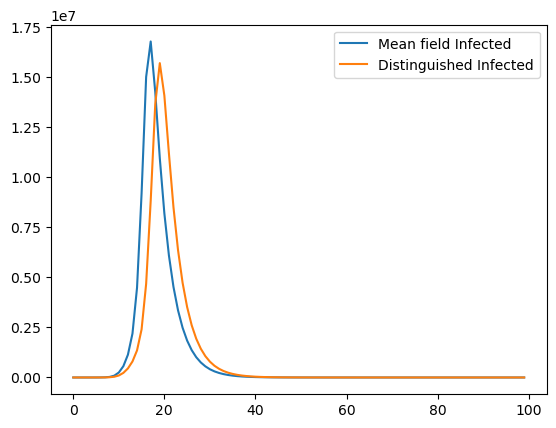

In [469]:
meanfield_ons = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=False)
distinguished_ons = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=True)
plt.plot(meanfield_ons[1].sum(axis=(1, 2)), label='Mean field Infected')
plt.plot(distinguished_ons[1].sum(axis=(1, 2)), label='Distinguished Infected')
plt.legend()
plt.show()

(array([ 1.,  0.,  0.,  0.,  9., 88.,  0.,  0.,  0.,  2.]),
 array([-221955. , -176059.3, -130163.6,  -84267.9,  -38372.2,    7523.5,
          53419.2,   99314.9,  145210.6,  191106.3,  237002. ]),
 <BarContainer object of 10 artists>)

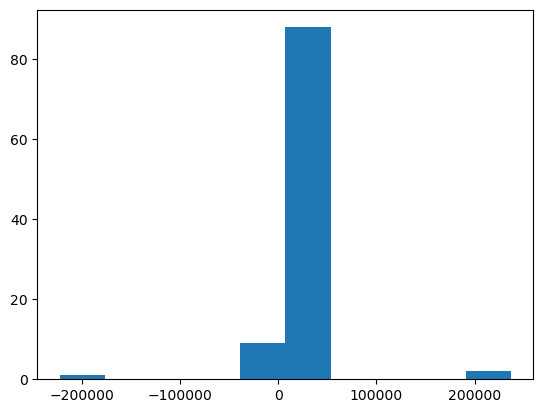

In [470]:
iterations = 100
peak_difference = np.zeros(iterations)
for i in range(iterations):
    _,i_m,_ = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=False)
    _,i_d,_ = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,t_max=t_max,seed_subpatch=seed_subpatch, distinguish=True)
    peak_difference[i] = i_m.max() - i_d.max()
plt.hist(peak_difference)


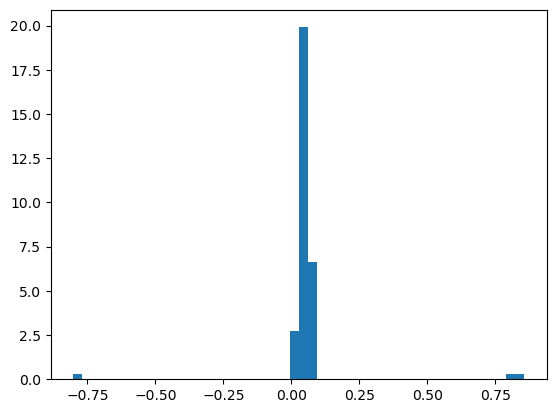

In [480]:
population = commuter_matrix.sum(axis=(0,1))
plt.hist(peak_difference/population*100, bins=50, density=True)
plt.show()